In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-02-26/full_trains.csv")

In [ ]:
data.head()
df = data

In [ ]:
#check statistics:
df.describe(include = 'all')

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,avg_delay_late_at_departure,avg_delay_all_departing,comment_delays_at_departure,num_arriving_late,avg_delay_late_on_arrival,avg_delay_all_arriving,comment_delays_on_arrival,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
count,5462.000000,5462.000000,4032,5462,5462,5462.000000,5462.000000,5462.000000,0.0,5462.000000,5462.000000,5462.000000,0.0,5453.000000,5453.000000,5462.000000,1541,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5457.000000,5457.000000,5457.000000,5457.000000
unique,NaN,NaN,2,59,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,National,PARIS LYON,PARIS LYON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ce mois-ci, l'OD a été touchée par les inciden...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3600,1139,1139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016.523618,6.369096,NaN,NaN,NaN,165.391150,281.069205,7.737276,NaN,41.577627,16.808900,2.539087,NaN,38.030075,32.454226,5.287201,NaN,0.277982,0.251820,0.183131,0.178773,0.069994,0.037302,26.090892,28.983826,11.648342,4.197178
std,1.124908,3.386042,NaN,NaN,NaN,78.939880,155.086779,23.653971,NaN,50.990911,8.802567,3.971868,NaN,30.329007,13.629937,5.003051,NaN,0.158786,0.147247,0.144341,0.127381,0.077427,0.052049,21.478016,18.873250,10.407551,4.681769
min,2015.000000,1.000000,NaN,NaN,NaN,45.956731,6.000000,0.000000,NaN,0.000000,0.000000,-4.467890,NaN,0.000000,0.000000,-143.968750,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000
25%,2016.000000,3.000000,NaN,NaN,NaN,100.770594,181.000000,0.000000,NaN,10.000000,11.975578,0.896013,NaN,17.000000,23.810000,2.706435,NaN,0.166667,0.151515,0.080000,0.092916,0.000000,0.000000,11.000000,8.993720,4.000000,1.000000
50%,2017.000000,6.000000,NaN,NaN,NaN,160.843797,238.000000,1.000000,NaN,23.000000,15.837025,1.782895,NaN,30.000000,30.757143,4.580854,NaN,0.257143,0.235294,0.161290,0.158435,0.052632,0.021277,20.000000,31.533333,9.000000,3.000000
75%,2018.000000,9.000000,NaN,NaN,NaN,205.699495,390.000000,4.000000,NaN,51.750000,20.284598,3.242813,NaN,50.000000,38.771429,7.251551,NaN,0.368421,0.333333,0.257143,0.240000,0.102564,0.057692,35.000000,41.000000,16.000000,6.000000


## Data transformation 


* create new column for date
* create new column for route (departure - arrival station) 
* create new column for % of late trains



In [ ]:
df["route"] = df["departure_station"] + df["arrival_station"]
df['date'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))
df['dept_late_perc'] = df['num_late_at_departure'] / df['total_num_trips']
df['arr_late_perc'] = df['num_arriving_late'] / df['total_num_trips']
df['num_arrive_on_time'] = df['total_num_trips'] - df['num_arriving_late']
df['num_depart_on_time'] =  df['total_num_trips'] - df['num_late_at_departure']
df.dtypes


year                                        int64
month                                       int64
service                                    object
departure_station                          object
arrival_station                            object
journey_time_avg                          float64
total_num_trips                             int64
num_of_canceled_trains                      int64
comment_cancellations                     float64
num_late_at_departure                       int64
avg_delay_late_at_departure               float64
avg_delay_all_departing                   float64
comment_delays_at_departure               float64
num_arriving_late                         float64
avg_delay_late_on_arrival                 float64
avg_delay_all_arriving                    float64
comment_delays_on_arrival                  object
delay_cause_external_cause                float64
delay_cause_rail_infrastructure           float64
delay_cause_traffic_management            float64


In [ ]:
# drop columns with no data 
df.dropna(axis=1, how='all')

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,num_late_at_departure,avg_delay_late_at_departure,avg_delay_all_departing,num_arriving_late,avg_delay_late_on_arrival,avg_delay_all_arriving,comment_delays_on_arrival,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late,route,date,dept_late_perc,arr_late_perc
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,15,11.550000,0.752007,17.0,13.794118,0.419844,NaN,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0,PARIS ESTMETZ,2017-09-01,0.050167,0.056856
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,10,14.653333,1.263518,23.0,13.570290,1.137558,NaN,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0,REIMSPARIS EST,2017-09-01,0.045872,0.105505
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,20,13.694167,1.139257,19.0,21.532456,1.586396,NaN,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0,PARIS ESTSTRASBOURG,2017-09-01,0.060060,0.057057
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,36,20.988426,1.406215,61.0,26.566667,4.788542,NaN,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0,PARIS LYONAVIGNON TGV,2017-09-01,0.074844,0.126819
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,16,20.963542,1.728947,38.0,23.151754,6.008860,NaN,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0,PARIS LYONBELLEGARDE (AIN),2017-09-01,0.084211,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,2018,9,NaN,ANGOULEME,PARIS MONTPARNASSE,130.690840,262,0,127,5.837664,2.886768,47.0,18.051064,4.893003,NaN,0.108696,0.369565,0.326087,0.108696,0.000000,0.086957,15.0,4.893003,6.0,1.0,ANGOULEMEPARIS MONTPARNASSE,2018-09-01,0.484733,0.179389
5458,2018,9,NaN,TOULOUSE MATABIAU,PARIS MONTPARNASSE,263.584270,178,0,13,5.517949,-0.013483,25.0,32.032667,7.000936,NaN,0.320000,0.320000,0.080000,0.240000,0.000000,0.040000,25.0,7.000936,10.0,1.0,TOULOUSE MATABIAUPARIS MONTPARNASSE,2018-09-01,0.073034,0.140449
5459,2018,9,NaN,PARIS MONTPARNASSE,TOURS,78.931818,176,0,24,9.431944,0.862121,32.0,18.482292,4.351136,NaN,0.050000,0.400000,0.300000,0.250000,0.000000,0.000000,10.0,4.351136,5.0,1.0,PARIS MONTPARNASSETOURS,2018-09-01,0.136364,0.181818
5460,2018,9,NaN,PARIS MONTPARNASSE,LAVAL,89.436893,206,0,15,6.712222,0.149595,7.0,9.911905,2.421278,NaN,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,4.0,2.421278,0.0,0.0,PARIS MONTPARNASSELAVAL,2018-09-01,0.072816,0.033981


In [ ]:
data.head()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,num_of_canceled_trains,comment_cancellations,num_late_at_departure,avg_delay_late_at_departure,avg_delay_all_departing,comment_delays_at_departure,num_arriving_late,avg_delay_late_on_arrival,avg_delay_all_arriving,comment_delays_on_arrival,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late,route,date
0,2017,9,National,PARIS EST,METZ,85.133779,299,0,NaN,15,11.550000,0.752007,NaN,17.0,13.794118,0.419844,NaN,0.250000,0.000000,0.166667,0.416667,0.166667,0.000000,6.0,24.033333,1.0,0.0,PARIS ESTMETZ,1970-01-01 00:00:00.000002026
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1,NaN,10,14.653333,1.263518,NaN,23.0,13.570290,1.137558,NaN,0.250000,0.375000,0.125000,0.125000,0.062500,0.062500,9.0,21.498148,1.0,0.0,REIMSPARIS EST,1970-01-01 00:00:00.000002026
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1,NaN,20,13.694167,1.139257,NaN,19.0,21.532456,1.586396,NaN,0.214286,0.214286,0.071429,0.285714,0.214286,0.000000,14.0,24.694048,3.0,0.0,PARIS ESTSTRASBOURG,1970-01-01 00:00:00.000002026
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1,NaN,36,20.988426,1.406215,NaN,61.0,26.566667,4.788542,NaN,0.155172,0.120690,0.310345,0.344828,0.034483,0.034483,40.0,34.047500,21.0,5.0,PARIS LYONAVIGNON TGV,1970-01-01 00:00:00.000002026
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,0,NaN,16,20.963542,1.728947,NaN,38.0,23.151754,6.008860,NaN,0.166667,0.250000,0.250000,0.305556,0.000000,0.027778,26.0,28.401282,8.0,1.0,PARIS LYONBELLEGARDE (AIN),1970-01-01 00:00:00.000002026


In [ ]:
#checkign data types 
df.dtypes

year                                 int64
month                                int64
service                             object
departure_station                   object
arrival_station                     object
journey_time_avg                   float64
total_num_trips                      int64
num_of_canceled_trains               int64
comment_cancellations              float64
num_late_at_departure                int64
avg_delay_late_at_departure        float64
avg_delay_all_departing            float64
comment_delays_at_departure        float64
num_arriving_late                  float64
avg_delay_late_on_arrival          float64
avg_delay_all_arriving             float64
comment_delays_on_arrival           object
delay_cause_external_cause         float64
delay_cause_rail_infrastructure    float64
delay_cause_traffic_management     float64
delay_cause_rolling_stock          float64
delay_cause_station_management     float64
delay_cause_travelers              float64
num_greater

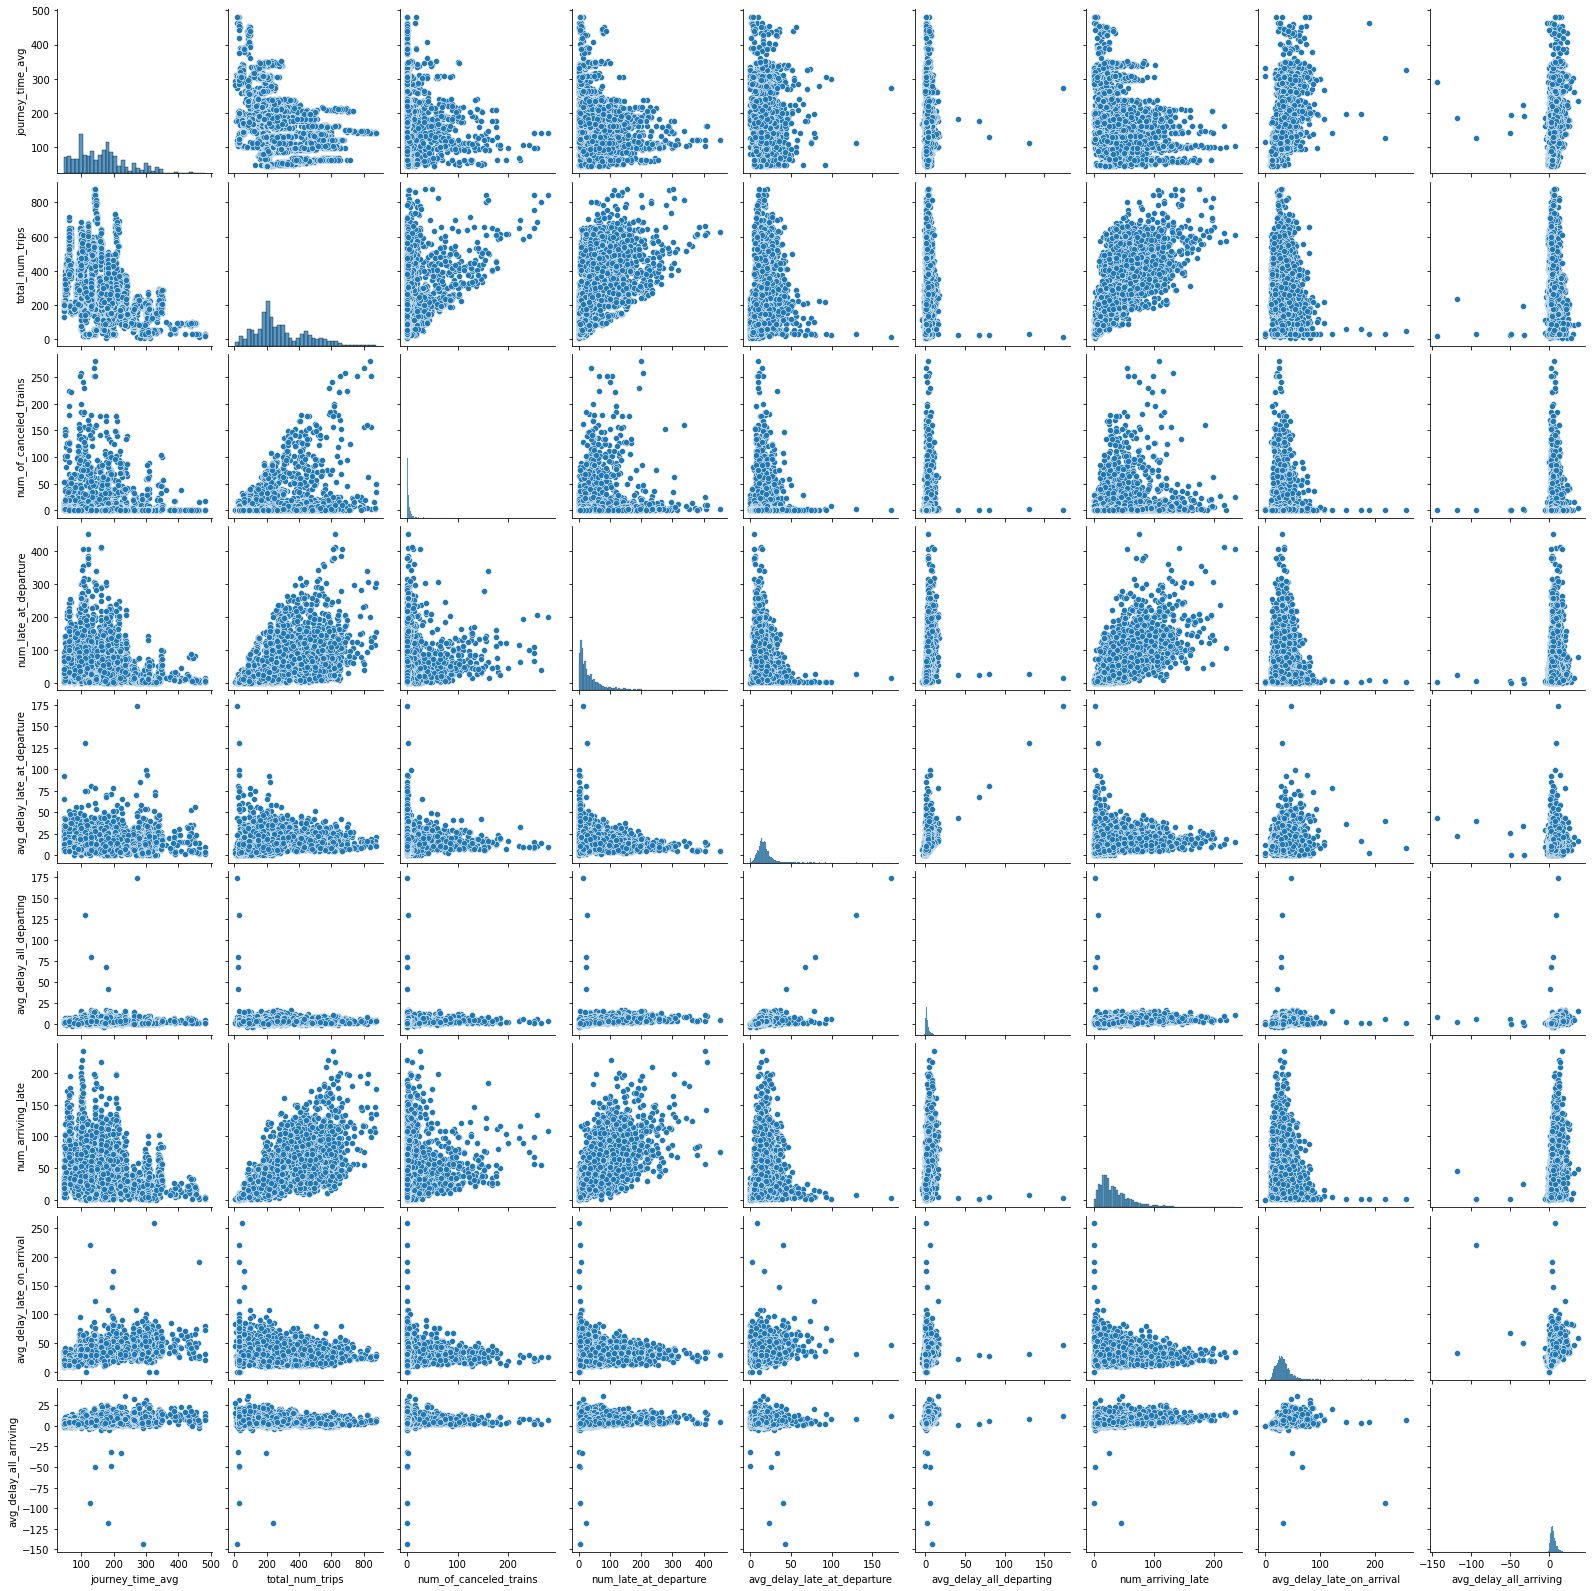

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = df[['departure_station','arrival_station','journey_time_avg', 'total_num_trips','num_of_canceled_trains',
           'num_late_at_departure', 'avg_delay_late_at_departure','avg_delay_all_departing','num_arriving_late', 'avg_delay_late_on_arrival', 'avg_delay_all_arriving' ]]
sns.pairplot(columns)

In [ ]:
from plotnine import * 


Bar charts to review data 

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


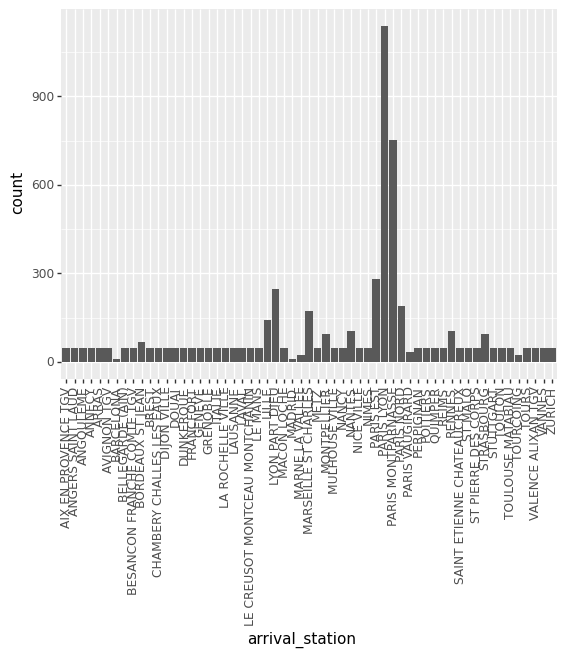

<ggplot: (-9223363247467534620)>

In [ ]:
(
    ggplot(df) 
    + geom_bar(aes(x='arrival_station'))
    + theme(axis_text_x=element_text(angle=90)) # rotate x-axis text for readability
   # + coord_flip()
)

In [ ]:
df2 = df[['departure_station', 'arrival_station', 'num_late_at_departure','num_arriving_late', 'num_arrive_on_time', 'num_depart_on_time']].melt(id_vars=["departure_station",'arrival_station'])
df2

,departure_station,arrival_station,variable,value
0,PARIS EST,METZ,num_late_at_departure,15.0
1,REIMS,PARIS EST,num_late_at_departure,10.0
2,PARIS EST,STRASBOURG,num_late_at_departure,20.0
3,PARIS LYON,AVIGNON TGV,num_late_at_departure,36.0
4,PARIS LYON,BELLEGARDE (AIN),num_late_at_departure,16.0
...,...,...,...,...
21843,ANGOULEME,PARIS MONTPARNASSE,num_depart_on_time,135.0
21844,TOULOUSE MATABIAU,PARIS MONTPARNASSE,num_depart_on_time,165.0
21845,PARIS MONTPARNASSE,TOURS,num_depart_on_time,152.0
21846,PARIS MONTPARNASSE,LAVAL,num_depart_on_time,191.0


In [ ]:
departure_late =  df2[df2['variable'].isin(['num_arriving_late', 'num_arrive_on_time'])]
    
(ggplot(departure_late) 
    + aes(x='arrival_station', y = 'value', fill = 'variable')
    + geom_bar(stat = 'identity')
    + theme(axis_text_x=element_text(angle=90)) 
)   

In [ ]:
df1 = pd.wide_to_long(df, stubnames='departing', i=['source'], j='number')

In [ ]:
stacked = df1.stack()
stacked

0     departure_station                 PARIS EST
      arrival_station                        METZ
      num_late_at_departure                    15
      num_arriving_late                        17
1     departure_station                     REIMS
                                      ...        
5460  num_arriving_late                         7
5461  departure_station                   ST MALO
      arrival_station          PARIS MONTPARNASSE
      num_late_at_departure                     4
      num_arriving_late                         5
Length: 21839, dtype: object

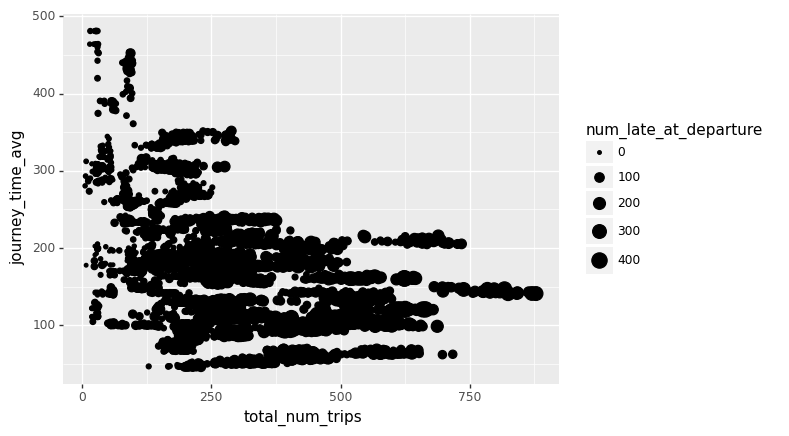

<ggplot: (-9223363280636191509)>

In [ ]:
(
    ggplot(df, aes(x='total_num_trips', 
                   y = 'journey_time_avg', 
                   size = 'num_late_at_departure' )) 
+ geom_point()
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 9 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


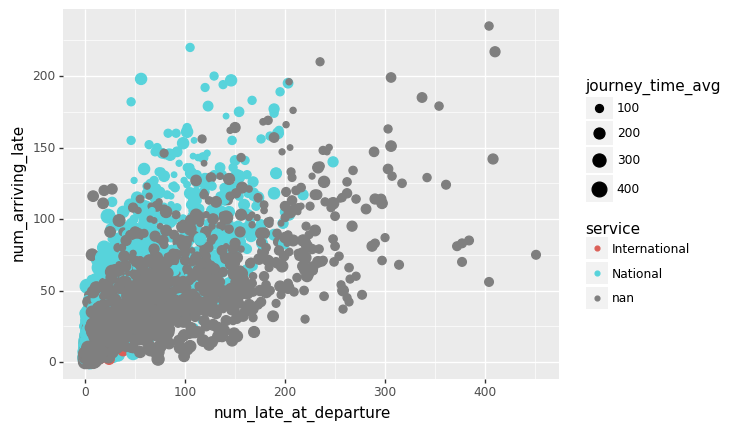

<ggplot: (-9223363265727555191)>

In [ ]:
(
    ggplot(df, aes(x='num_late_at_departure', 
                   y = 'num_arriving_late', 
                   size = 'journey_time_avg', 
                   color = 'service' )) 
+ geom_point()
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 9 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


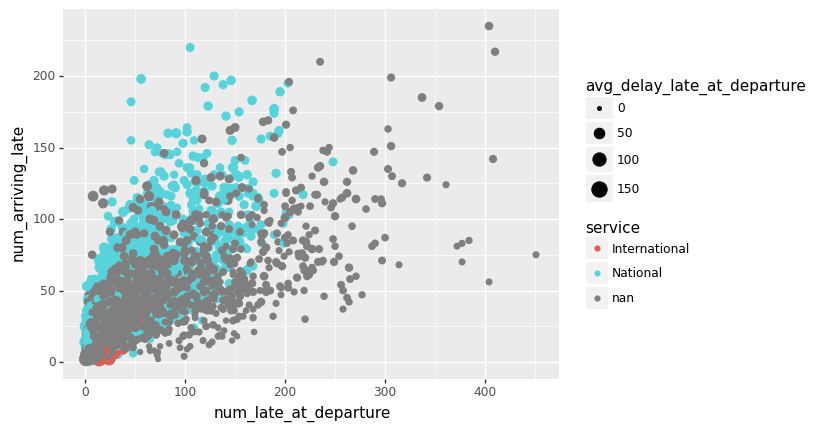

<ggplot: (-9223363265727597557)>

In [ ]:
(
    ggplot(df, aes(x='num_late_at_departure', 
                   y = 'num_arriving_late', 
                   size = 'avg_delay_late_at_departure', 
                   color = 'service' )) 
+ geom_point()
)

When have most delays happened? 
 Using geom_bar

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


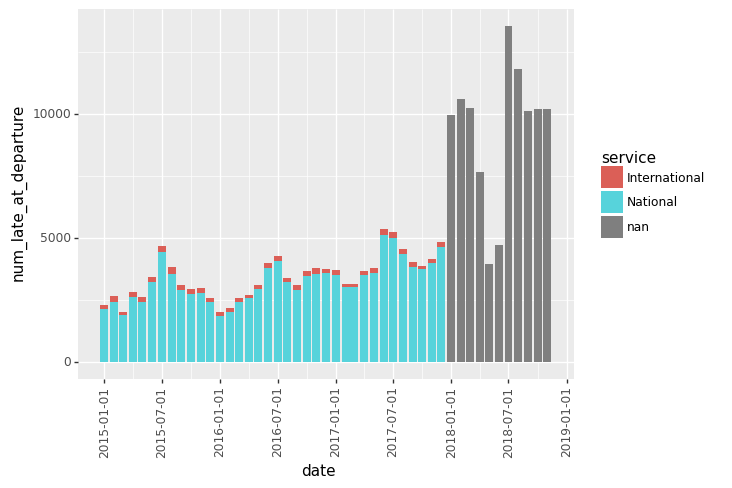

<ggplot: (-9223363265729534355)>

In [ ]:
(
    ggplot(df) 
    + aes(x='date', y = 'num_late_at_departure', fill = 'service')
    + geom_bar(stat = 'identity')
    + theme(axis_text_x=element_text(angle=90)) 
)   

#By default, geom_bar uses stat="count" which makes the height of the bar proportion to the number of cases in each group (or if the weight aethetic is supplied, the sum of the weights). 
#If you want the heights of the bars to represent values in the data, use stat="identity" and map a variable to the y aesthetic.

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


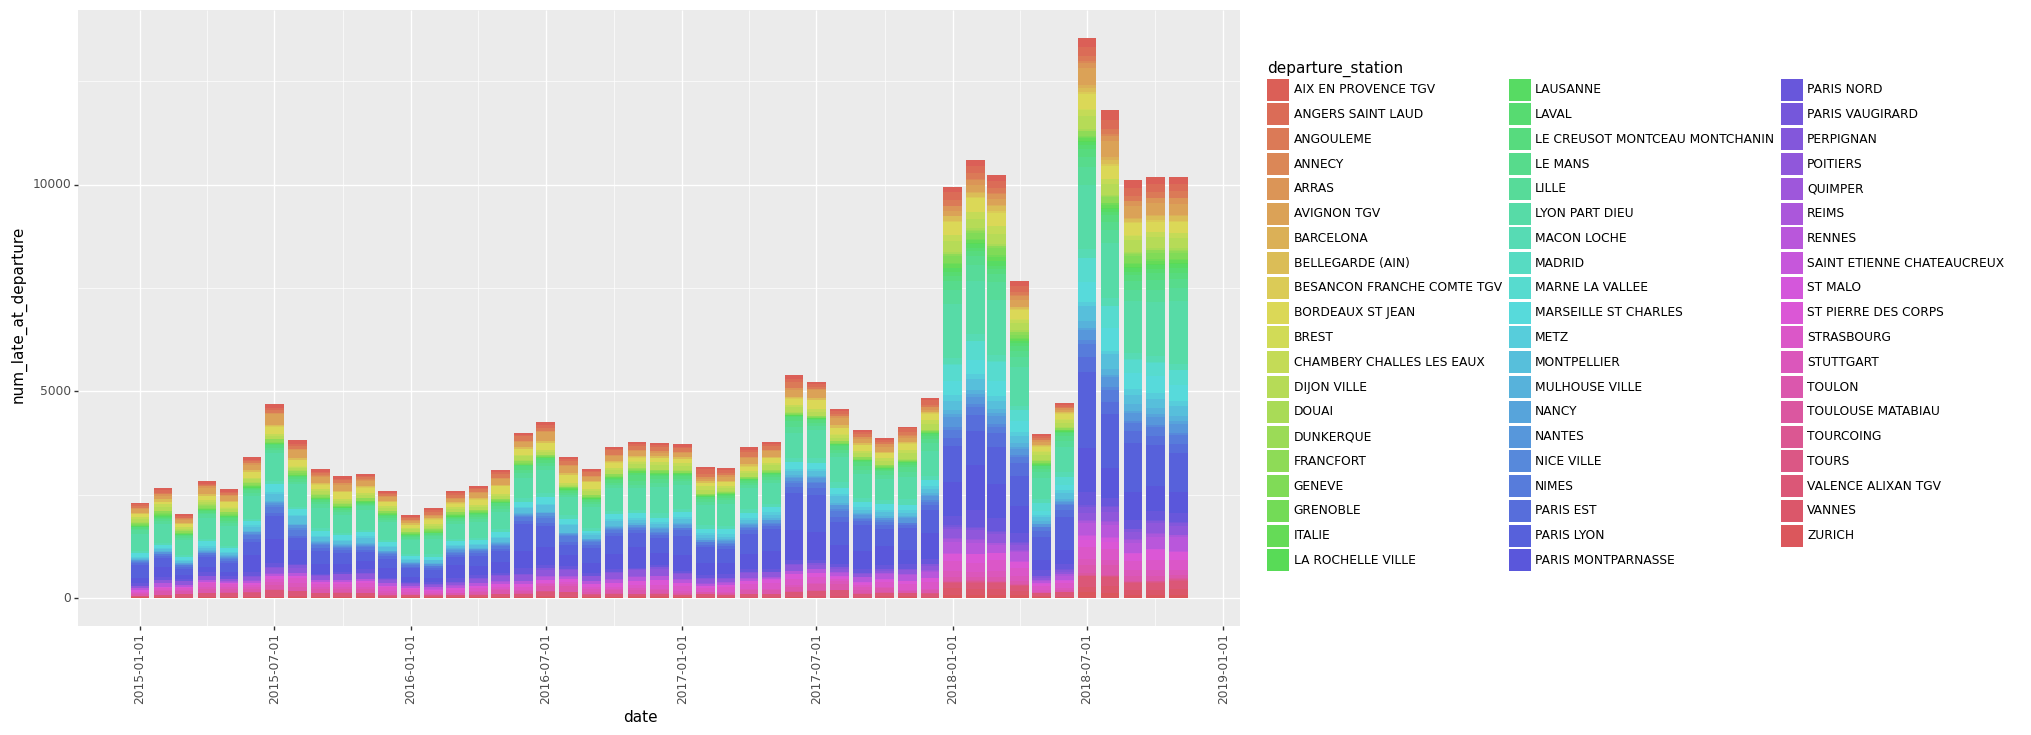

<ggplot: (8771124719280)>

In [ ]:
(
    ggplot(df) 
    + aes(x='date', y = 'num_late_at_departure' , fill = 'departure_station' )
    + geom_bar(stat = 'identity') 
    + theme(figure_size = (15, 8) , axis_text_x=element_text(angle=90))
)   

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


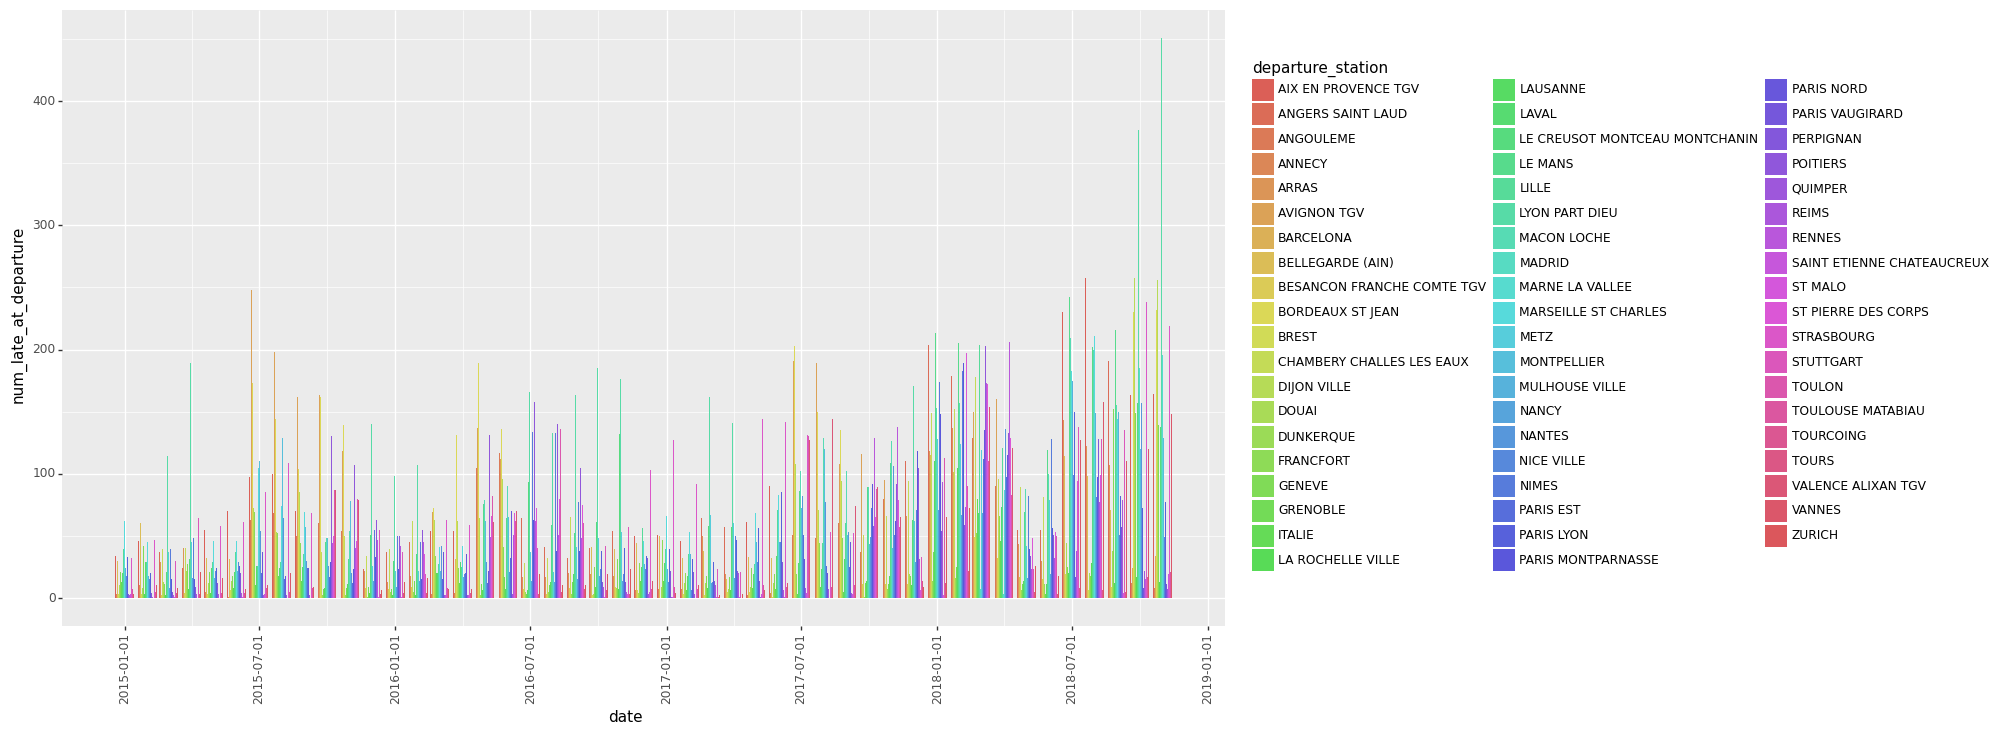

<ggplot: (-9223363265727815708)>

In [ ]:
(
    ggplot(df) 
    + aes(x='date', y = 'num_late_at_departure' , fill = 'departure_station' )
    + geom_col(stat='identity', position='dodge') # adding second bar chart dimension  - num_arriving_late   
    + theme(figure_size = (15, 8) , axis_text_x=element_text(angle=90))
)   

#By default, geom_bar uses stat="count" which makes the height of the bar proportion to the number of cases in each group (or if the weight aethetic is supplied, the sum of the weights). 
#If you want the heights of the bars to represent values in the data, use stat="identity" and map a variable to the y aesthetic.

Which stations have most delays? 

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


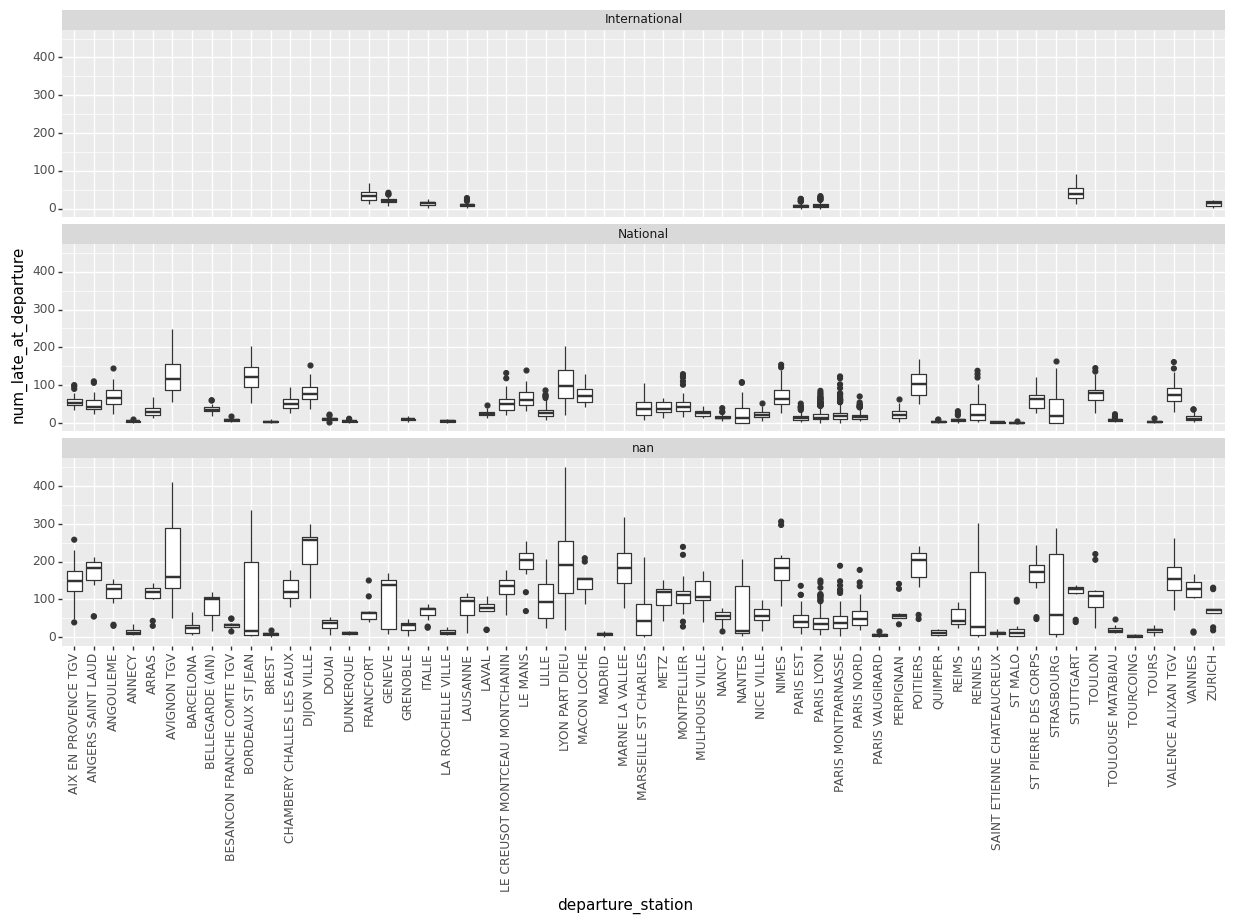

<ggplot: (8771123992773)>

In [ ]:
(
ggplot(df)
+ aes(x='departure_station', y='num_late_at_departure') 
+ geom_boxplot() #using boxplot
+ theme(figure_size = (15, 8) , axis_text_x=element_text(angle=90))
+ facet_wrap("service", nrow = 3) # making plot area wider and rotating labels  
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


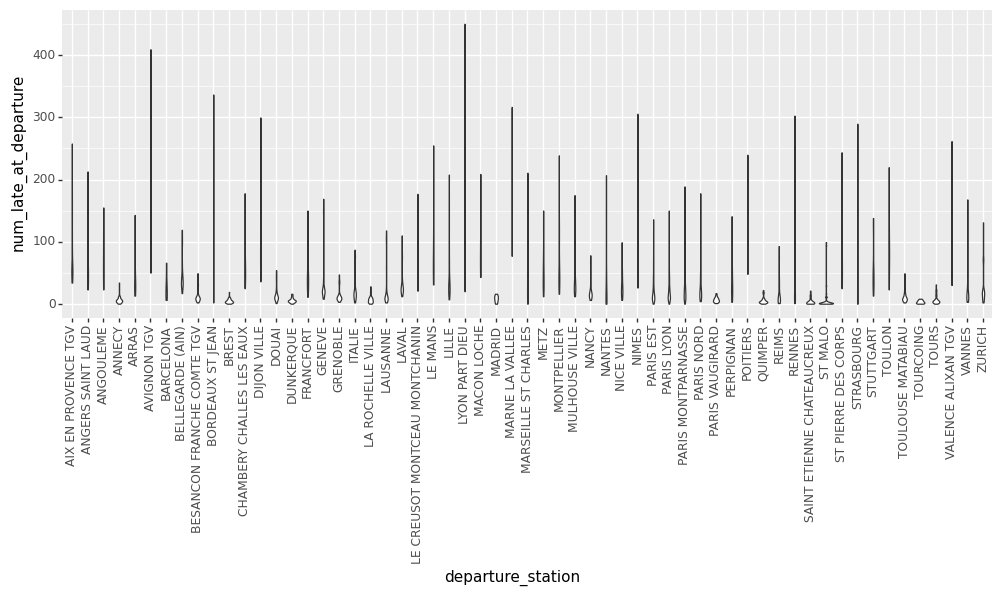

<ggplot: (8771126368534)>

In [ ]:
(
ggplot(df)
+ aes(x='departure_station', y='num_late_at_departure') 
+ geom_violin() #viewing as  distributions
+ theme(figure_size = (12,4) , axis_text_x=element_text(angle=90)) # making plot area wider and rotating labels  
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_ydensity : Removed 9 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


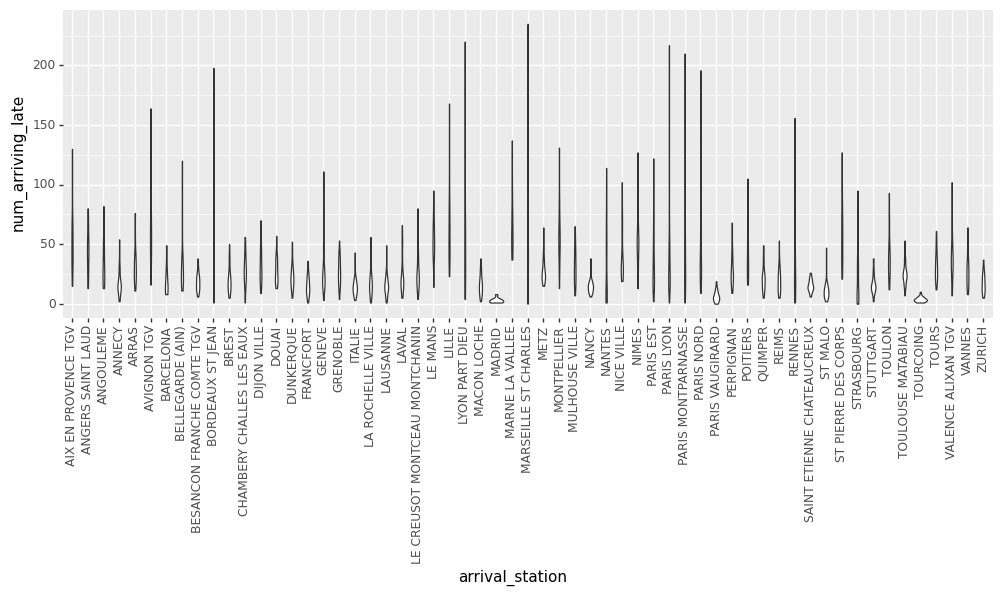

<ggplot: (8771125581709)>

In [ ]:
(
ggplot(df)
+ aes(x='arrival_station', y='num_arriving_late') 
+ geom_violin() #viewing as  distributions
+ theme(figure_size = (12,4) , axis_text_x=element_text(angle=90)) # making plot area wider and rotating labels  
)

## Create a heatmap of arrival and departure stations and the delay times 

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


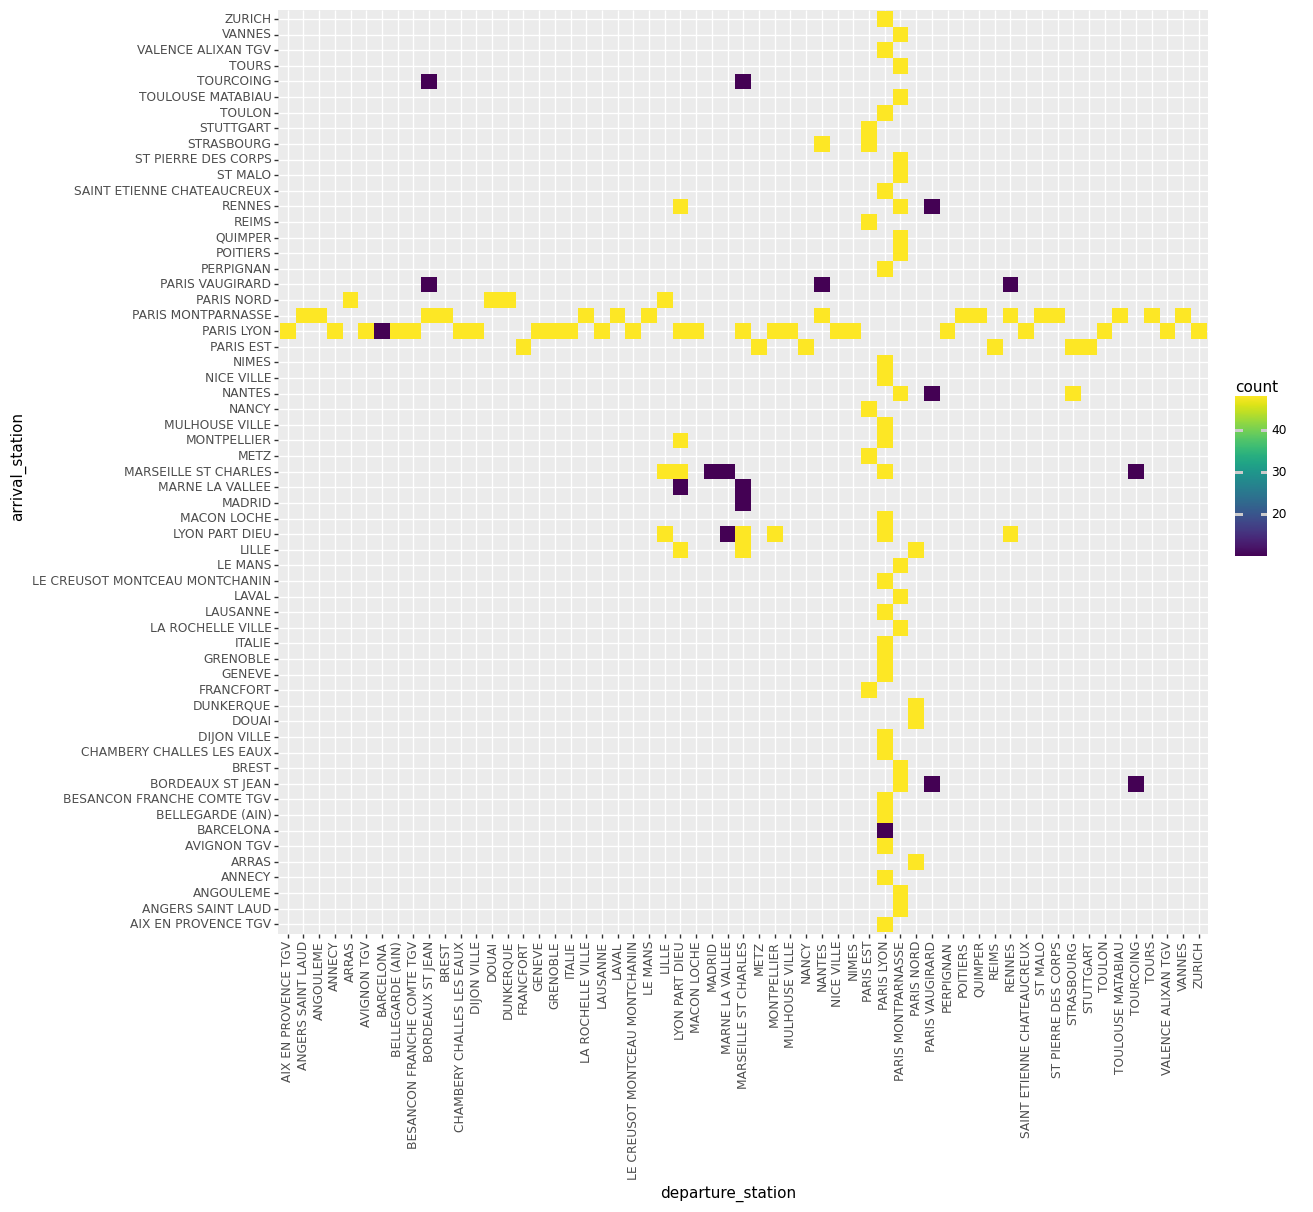

<ggplot: (-9223363265728117602)>

In [ ]:
(
    ggplot(df) 
    + aes(x ='departure_station', y ='arrival_station')
    + theme(figure_size = (12,12), axis_text_x=element_text(angle=90))
    + geom_bin2d()
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


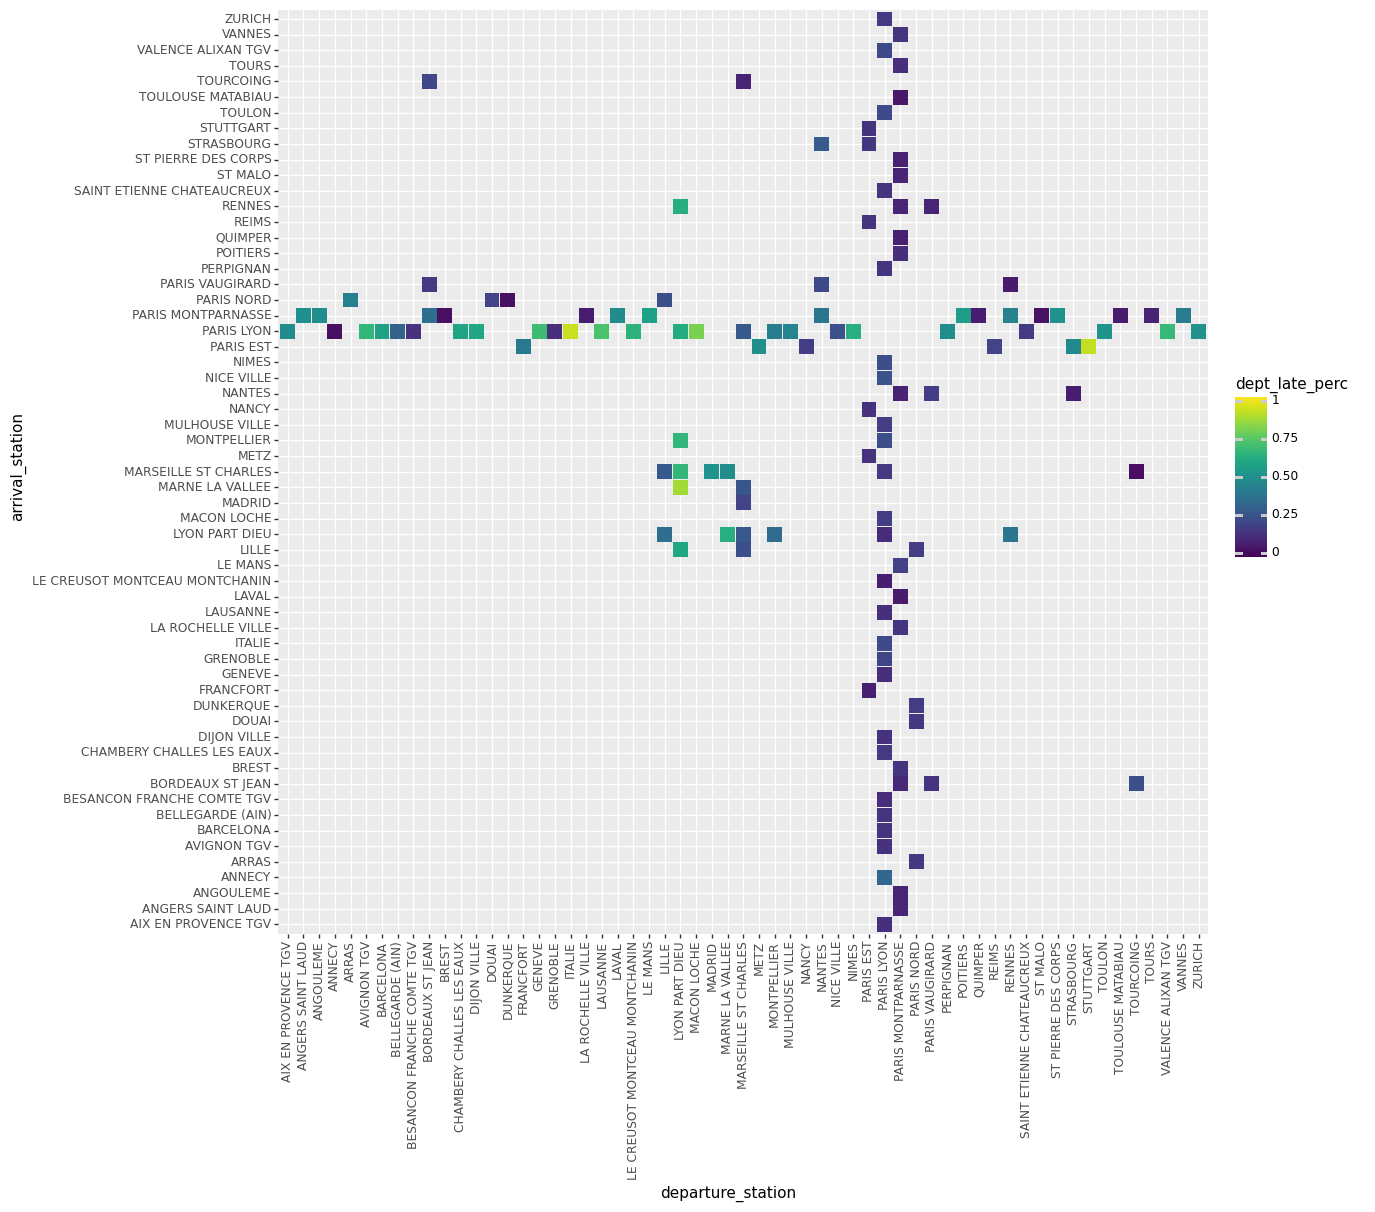

<ggplot: (8771122893025)>

In [ ]:
(
    ggplot(df) 
    + aes(x ='departure_station', y ='arrival_station', fill = 'dept_late_perc')
    + theme(figure_size = (12,12), axis_text_x=element_text(angle=90))
    + geom_tile(aes(width=.95, height=.95))
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


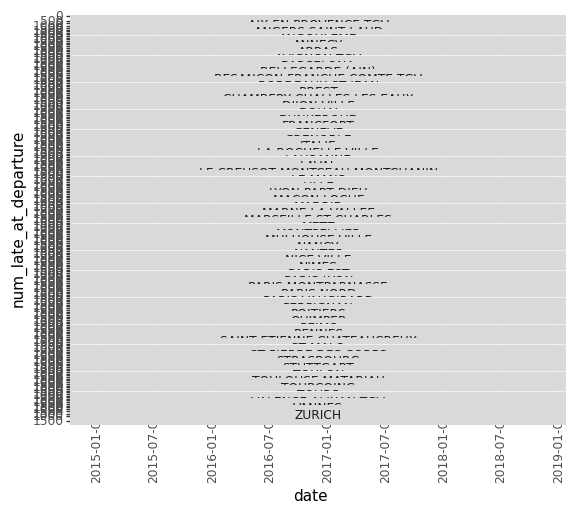

<ggplot: (8771124284122)>

In [ ]:
(
    ggplot(df) 
    + aes(x='date', y = 'num_late_at_departure')
    + geom_bar(stat = 'identity')
    + theme(axis_text_x=element_text(angle=90)) 
    + facet_wrap('departure_station', nrow = 59)
)   

#usign faceting to look at individual departure stations 

# Density plots for average delays 


/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


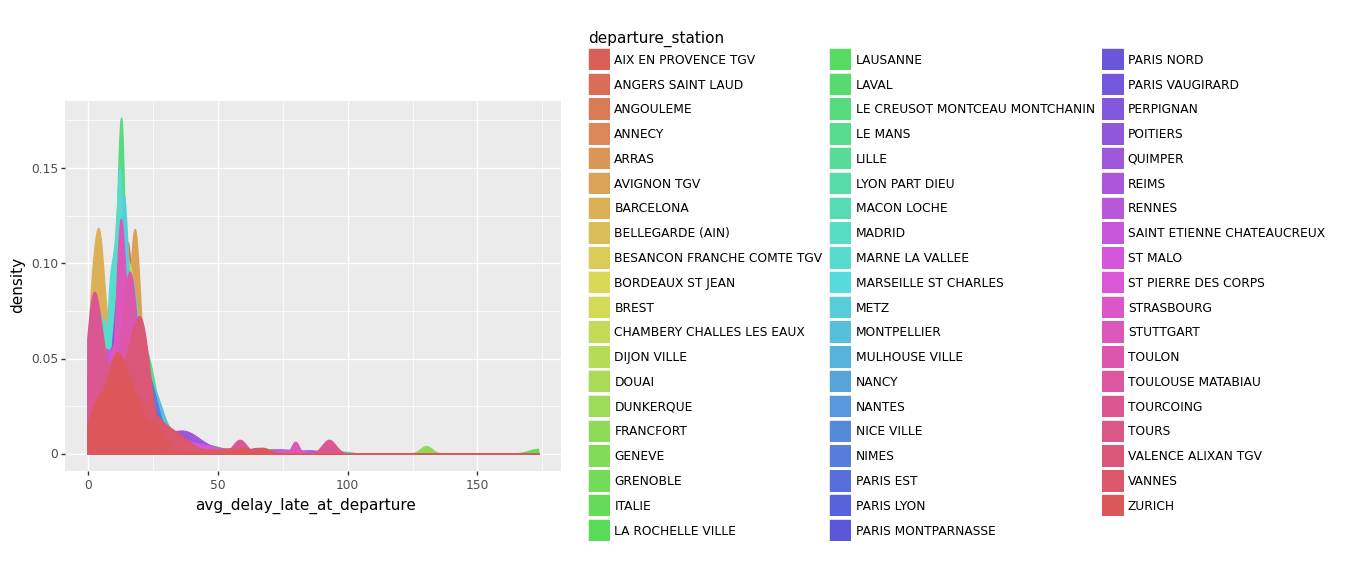

<ggplot: (8771124804770)>

In [ ]:
(
ggplot(df)
+ aes(x='avg_delay_late_at_departure', color = 'departure_station', fill ='departure_station' )
+ geom_density()
)

/usr/local/lib/python3.6/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


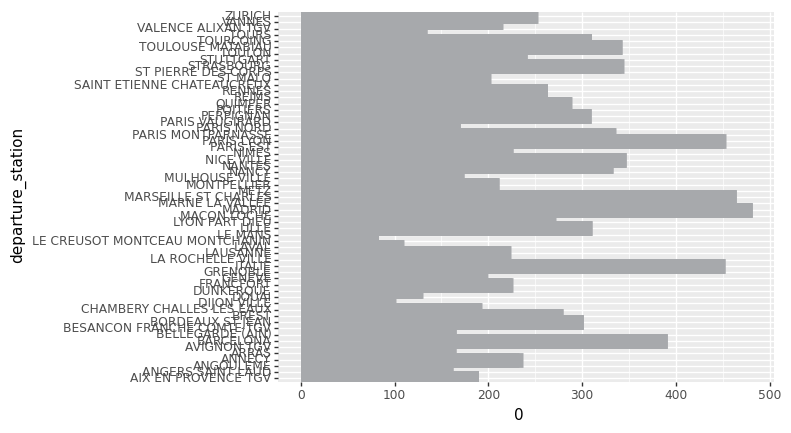

<ggplot: (-9223363265731524755)>

In [ ]:
(
    ggplot(df)

    # Range strip
    + geom_segment(
     aes(x= 0 , xend='journey_time_avg', y='departure_station', yend='departure_station'),
     size=6,
     color='#a7a9ac')
    
    ##+ geom_text(
     #aes(x='arrival_station', y='departure_station', label='arrival_station'),
     #size=9)
)
#    + geom_text(aes('journey_time_avg'	, 'departure_station', label='departure_station'), ha='right', size=9)
#    + geom_text(aes('journey_time_avg'	, 'arrival_station', label='arrival_station'), ha='left', size=9)
#    + theme(figure_size = (15,15))
